In [ ]:
library(ggplot2)
df <- read.csv(file = "/content/final_df.csv", header = TRUE, sep = ",")

In [ ]:
str(df)

'data.frame':	70692 obs. of  20 variables:
 $ Diabetes_binary     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HighBP              : int  0 1 1 1 1 1 1 0 1 0 ...
 $ HighChol            : int  0 1 0 1 0 1 1 0 0 0 ...
 $ CholCheck           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  18 24 27 16 14 15 9 17 25 13 ...
 $ Smoker              : int  0 1 0 0 1 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 1 0 0 0 0 ...
 $ PhysActivity        : int  1 0 1 1 1 1 1 1 1 1 ...
 $ Veggies             : int  1 0 1 1 1 1 1 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ GenHlth             : int  1 3 2 2 4 4 4 2 2 2 ...
 $ MentHlth            : int  3 21 1 1 3 1 1 1 1 1 ...
 $ PhysHlth            : int  1 4 2 1 21 6 1 1 11 1 ...
 $ DiffWalk            : int  0 0 0 0 1 0 0 0 0 0 ...
 $ Sex                 : int  1 0 0 1 0 0 0 1 1 0 ...
 $ Age                 : in

In [ ]:
df[, c("Diabetes_binary", "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "GenHlth", "DiffWalk", "Sex", "Age", "Education", "Income")] <- lapply(df[, c("Diabetes_binary", "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "GenHlth", "DiffWalk", "Sex", "Age", "Education", "Income")], as.factor)
str(df)

'data.frame':	70692 obs. of  20 variables:
 $ Diabetes_binary     : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HighBP              : Factor w/ 2 levels "0","1": 1 2 2 2 2 2 2 1 2 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 1 2 1 2 1 2 2 1 1 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  18 24 27 16 14 15 9 17 25 13 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 1 2 1 1 2 2 2 2 2 1 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 2 1 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ GenHlth             : Factor w/ 5 levels "1"

In [ ]:
# install the kernlab (for SVM)
if(require(kernlab) == FALSE){
  install.packages('kernlab')
  library(kernlab)
}

## Data preparation

In [ ]:
### create a 70/30 training/test set split
### set the random seed to 2018
set.seed(2018)
n_rows <- nrow(df)
training_idx <- sample(n_rows, n_rows * 0.7)
training_df<- df[training_idx,]
test_df <- df[-training_idx,]

## SVM training

In [ ]:
df_formula <- reformulate(names(training_df[, -1]), response = 'Diabetes_binary')
### train with SVM (I chose cost and kernel function)
svm_df <- ksvm(df_formula, data = training_df, kernel = 'rbfdot', C = 1, prob.model = TRUE)

## SVM prediction

In [ ]:
### compute the prediction for the test set with the SVM model
svm_df_pred <- predict(svm_df, test_df[,-1], type= "response")
### create a table with actual and predicted values
svm_table <- table(svm = svm_df_pred,  actual = test_df$Diabetes_binary)
svm_table

   actual
svm    0    1
  0 7390 2159
  1 3163 8496

In [ ]:
### Calculate accuracy values from the contingency tables
acc_svm_results <- sum(diag(svm_table)) / sum(svm_table)
acc_svm_results

[1] 0.749057

## Performance evaluation

In [ ]:
#  combine actual, predicted and probability prediction in a data frame
perf_eval <-  cbind(
  actual = test_df$Diabetes_binary,
  predicted = svm_df_pred,
  as.data.frame(predict(svm_df, test_df[,-1], type = 'prob'))
)

In [ ]:
install.packages("yardstick")
install.packages("caret")
library(yardstick)
library(caret)

In [ ]:
# generate a confusion matrix for the predicted model
#   returns also Accuracy, Kappa, Sensitivity and Specificity
#    the positive class has been explicitly declared as the second one e therefore with "1"

conf_matrix <- confusionMatrix(data = perf_eval$predicted, reference = perf_eval$actual, positive = "1")
conf_matrix



Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 7390 2159
         1 3163 8496
                                          
               Accuracy : 0.7491          
                 95% CI : (0.7432, 0.7549)
    No Information Rate : 0.5024          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4979          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7974          
            Specificity : 0.7003          
         Pos Pred Value : 0.7287          
         Neg Pred Value : 0.7739          
             Prevalence : 0.5024          
         Detection Rate : 0.4006          
   Detection Prevalence : 0.5497          
      Balanced Accuracy : 0.7488          
                                          
       'Positive' Class : 1               
                        

In [ ]:
TP <- 7390
TN <- 8496
FP <- 2159
FN <- 3163
sensitivity = 0.7974

# Precision / Positive Predictive Value (PPV)
precision <- TP / (TP + FP)
cat("Precision / Positive Predictive Value (PPV):", precision, "\n")

# F1 Score
f1_score <- 2 * (precision * sensitivity) / (precision + sensitivity)
cat("F1 Score:", f1_score, "\n")

Precision / Positive Predictive Value (PPV): 0.773903 
F1 Score: 0.7854758 


In [ ]:
###  prepare two data frames to generate a ROC curve:
#   a data frame with the probability scores for the prediction of "1"
#   a data frame with the TRUE for actual values equal to "1"
model_prob <- data.frame(
  svm_col = perf_eval[,4]
)
label <- data.frame(
  svm_col = perf_eval$actual == "1"
)


##ROC curve

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



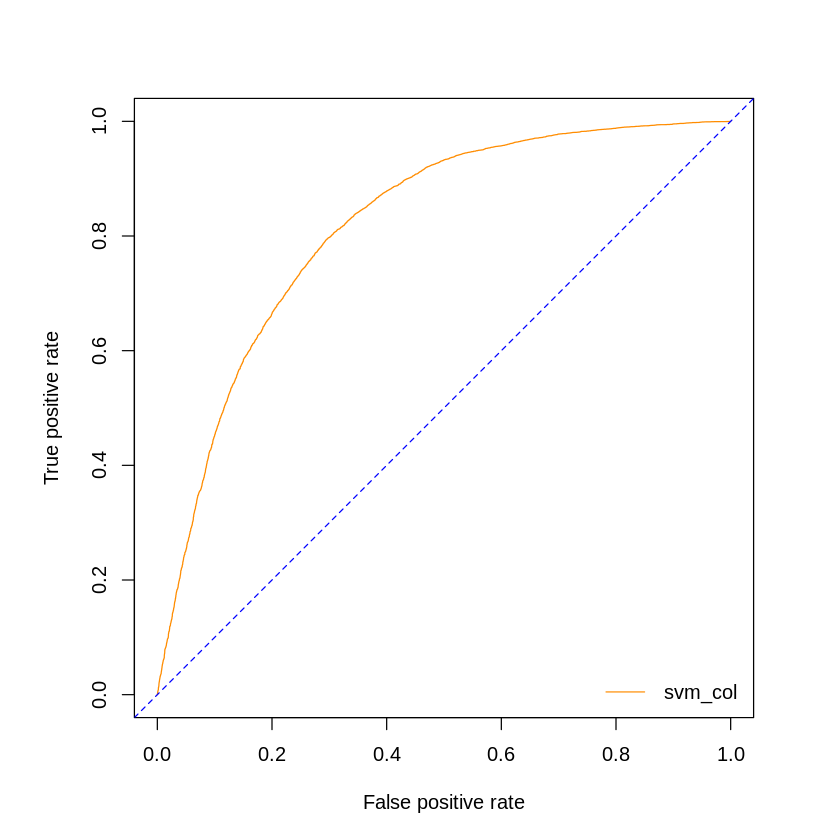

In [ ]:
# ROCR requires to create a prediction and a performance object
install.packages("ROCR")
library(ROCR)

# It is necessary to convert the prediction vector into a continuous vector before using the prediction() function
ROC_pred <- prediction(model_prob, label)
ROC_perf <- performance(ROC_pred, "tpr", "fpr")

# Plot the ROC curve
opar <- par(no.readonly = TRUE)
par(pty = 's')
plot(
  ROC_perf,
  col = "dark orange"
)
abline(a = 0, b = 1, lty = 2, col = 'blue')
legend(
  "bottomright",
  names(model_prob),
  col = "dark orange",
  lty = 1,
  bty = 'n'
)





In [ ]:
#Calculate the AUC value
auc <- performance(ROC_pred, measure = "auc")@y.values[[1]]
auc

[1] 0.8186521